In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**IMDB Movie Data Exploratory Data Analysis**

TODO - talk about EDA

TODO - talk about the dataset(source, what it contains, how it is useful)
* Kaggle
* information about movies released in past years
* can be used identify the super hit and flop movies

##**Download the Data**




In [14]:
pip install opendatasets --upgrade

In [15]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/anandshaw2001/imdb-data'
od.download(download_url)

Skipping, found downloaded files in "./imdb-data" (use force=True to force download)


In [16]:
data_filename = './imdb-data/Imdb Movie Dataset.csv'

##**Data Cleaning and Preparation**

1.Load files using pandas

2.Load info about file

3.Fix any missing values or incorrect values

In [17]:
df = pd.read_csv(data_filename)
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,160000000,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,11/5/2014,701729206,169,False,165000000,...,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,7/16/2008,1004558444,152,False,185000000,...,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,12/15/2009,2923706026,162,False,237000000,...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,4/25/2012,1518815515,143,False,220000000,...,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [18]:
df.shape

(1048575, 21)

We can see we have more then 1 million records of movies released in the past

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

Info of the data :


1.   21 columns/features
2.   1048575
3.   Various columns with null values



In [20]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [21]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,7.546888e+05,2.041560e+00,2.045584e+01,7.604112e+05,4.822610e+01,2.913232e+05,1.276393e+00
std,4.207457e+05,3.097234e+00,3.315669e+02,1.944925e+07,6.057823e+01,5.319290e+06,7.889555e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,3.846625e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,8.183790e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,0.000000e+00,6.000000e-01
75%,1.140640e+06,5.000000e+00,1.000000e+00,0.000000e+00,8.900000e+01,0.000000e+00,9.170000e-01
max,1.411041e+06,1.000000e+01,3.449500e+04,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03


####checking for null values

In [22]:
percentage_missing = df.isnull().sum().sort_values(ascending =False) / len(df)
percentage_missing

,0
tagline,0.854347
keywords,0.720935
production_companies,0.542096
imdb_id,0.465396
production_countries,0.442026
spoken_languages,0.420248
genres,0.395749
overview,0.205826
release_date,0.173394
original_title,0.000012


<Axes: >

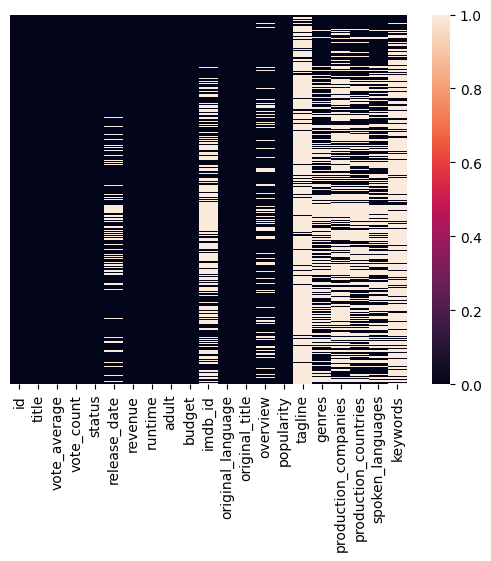

In [23]:
sns.heatmap(df.isnull() , yticklabels=False)

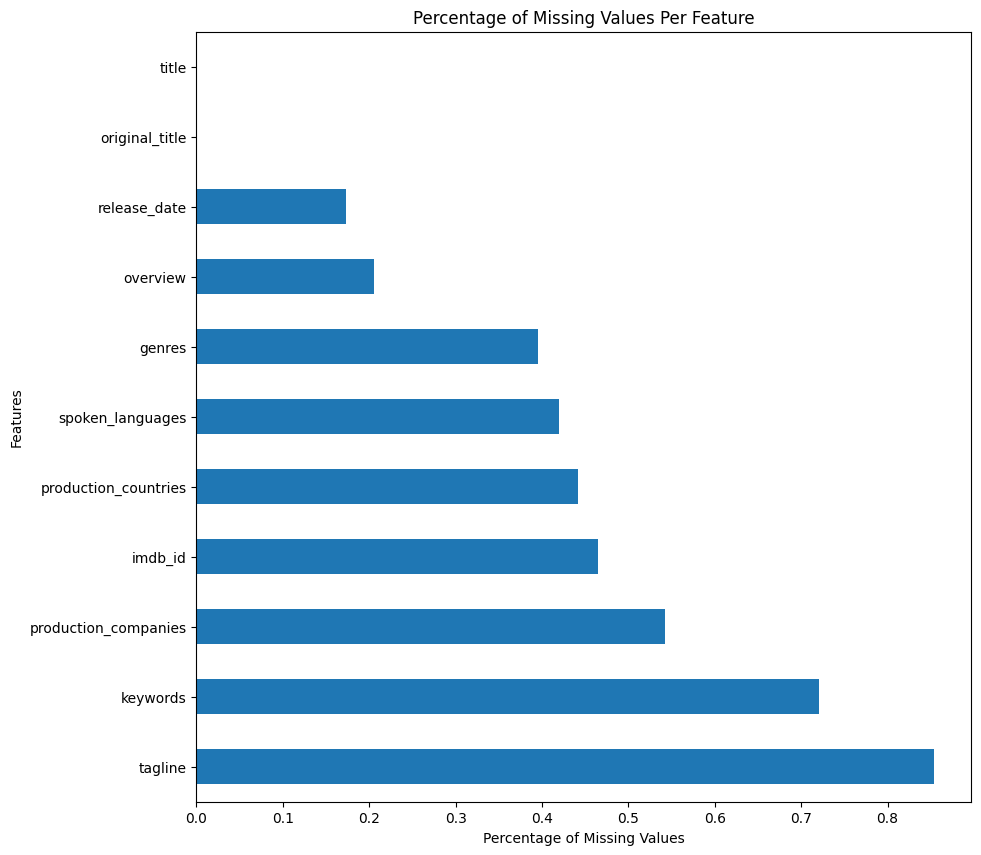

In [24]:
percentage_missing = percentage_missing[percentage_missing > 0]
percentage_missing.plot(
    kind = 'barh',
    figsize = (10,10),
    xlabel  = 'Percentage of Missing Values',
    ylabel  = 'Features',
    title   = 'Percentage of Missing Values Per Feature'
);

The columns with the highest number of missing values:


*   Tagline
*   Keywords
*   Production_companies



##**Data Visualisation And Exploratory Analysis**

1.  Revenue
2.  Budget
3.  Popularity
4.  vote_count
5.  Genre

In [25]:
df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'keywords'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1048575 non-null  int64  
 1   title                 1048562 non-null  object 
 2   vote_average          1048575 non-null  float64
 3   vote_count            1048575 non-null  int64  
 4   status                1048575 non-null  object 
 5   release_date          866758 non-null   object 
 6   revenue               1048575 non-null  int64  
 7   runtime               1048575 non-null  int64  
 8   adult                 1048575 non-null  bool   
 9   budget                1048575 non-null  int64  
 10  imdb_id               560572 non-null   object 
 11  original_language     1048575 non-null  object 
 12  original_title        1048562 non-null  object 
 13  overview              832751 non-null   object 
 14  popularity            1048575 non-

####**Exploring Revenue**

In [27]:
df.revenue

,revenue
0,825532764
1,701729206
2,1004558444
3,2923706026
4,1518815515
...,...
1048570,0
1048571,0
1048572,0
1048573,0


In [28]:
df.revenue.describe()

,revenue
count,1.048575e+06
mean,7.604112e+05
std,1.944925e+07
min,-1.200000e+01
25%,0.000000e+00
50%,0.000000e+00
75%,0.000000e+00
max,5.000000e+09


In [29]:
df.revenue.max()

4999999999

####**Exploring Genres**

In [30]:
df.genres.unique()

array(['Action, Science Fiction, Adventure',
       'Adventure, Drama, Science Fiction',
       'Drama, Action, Crime, Thriller', ...,
       'Drama, Fantasy, Romance, History',
       'Animation, Adventure, Science Fiction, Fantasy',
       'Romance, Comedy, Mystery, Crime'], dtype=object)

In [31]:
df.groupby('genres').id.count().sort_values(ascending = False)

,id
genres,
Documentary,120668
Drama,98981
Comedy,55356
Animation,28577
Music,23134
...,...
"Documentary, Comedy, Adventure, Drama",1
"Documentary, Comedy, Adventure, Drama, War",1
"Documentary, Comedy, Adventure, Family, Romance",1


we can see that the imdb data has a large number of Documnetary data

In [32]:
top_5_genres = df.groupby('genres').id.count().sort_values(ascending = False)[:5]
top_5_genres

,id
genres,
Documentary,120668
Drama,98981
Comedy,55356
Animation,28577
Music,23134


The top 5 Genres are with most movies:

    1) Documentary	120668
    2) Drama	       98981
    3) Comedy	      55356
    4) Animation	   28577
    5) Music	       23134

<Axes: xlabel='genres'>

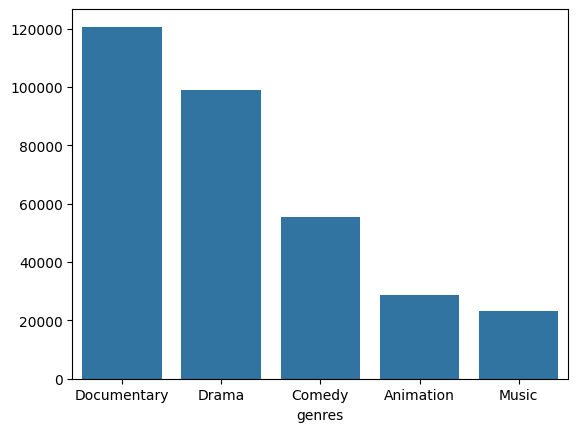

In [33]:
sns.barplot(x=top_5_genres.index , y = top_5_genres.values)

####**Finding the top 5 genres with the max revenue for a single movie**

In [34]:
top_5_revenue_genres = df.groupby('genres').revenue.max().sort_values(ascending = False).head()

In [35]:
top_5_revenue_genres

,revenue
genres,
"Horror, War",3000000000
"Drama, Comedy",3000000000
"Action, Adventure, Fantasy, Science Fiction",2923706026
"Adventure, Science Fiction, Action",2800000000
"Science Fiction, Adventure, Action",2320250281


####**Plotting the top 5 genres with the max revenue for a single movie**

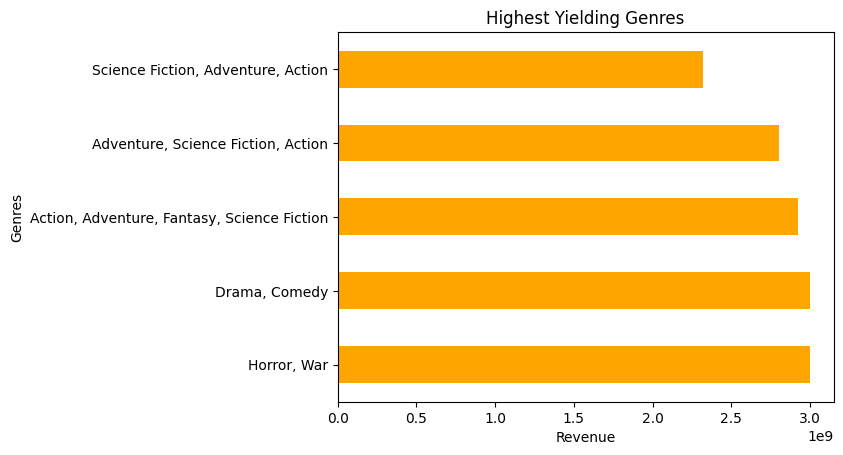

In [36]:
top_5_revenue_genres.plot(
    kind = 'barh',
    xlabel = 'Revenue',
    ylabel = 'Genres',
    title = 'Highest Yielding Genres',
    color = 'Orange'
);

####**Finding genres with the lowest revenue for a single movie**

In [37]:
lowest_revenue_genres = df.groupby('genres').revenue.min().sort_values(ascending = True).head()
lowest_revenue_genres

,revenue
genres,
Action,0
"History, Drama, Western",0
"History, Family",0
"History, Family, Adventure",0
"History, Family, Animation, Drama",0


####**Finding the top 5 genres with the max overall combined revenue**

In [38]:
max_overall_revenue = df.groupby('genres').revenue.sum().sort_values(ascending = False).head()
max_overall_revenue

,revenue
genres,
Comedy,26863424681
"Action, Adventure, Science Fiction",24480900433
Drama,19522210101
"Comedy, Romance",18894166937
"Adventure, Action, Science Fiction",18106666033


####**Plotting the max overall revenue**

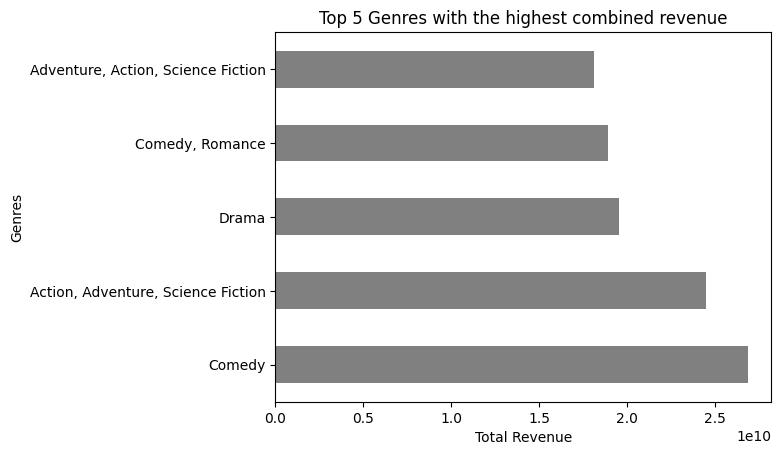

In [39]:
max_overall_revenue.plot(
    kind ='barh',
    xlabel = 'Total Revenue',
    ylabel = 'Genres',
    title = 'Top 5 Genres with the highest combined revenue',
    color = 'grey'

);

####**Max and minimum vote count per movie**

In [40]:
df[df.vote_count == df.vote_count.max()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,7/15/2010,825532764,148,False,160000000,...,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."


In [41]:
df[df.vote_count == (df.vote_count[df.vote_count > 0].min())].head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
224632,688020,Passion,10.0,1,Released,6/7/2012,0,180,True,0,...,en,Passion,Your favorite boys are back for more: Whom wil...,0.600,NaN,NaN,BelAmi Entertainment,Czech Republic,NaN,NaN
224633,1265604,Hidden Era,10.0,1,Released,NaN,0,80,False,0,...,en,Hidden Era,Era Oculta – “Hidden Era” unfolds in the vibra...,0.600,Feature narrative Era Oculta – “Hidden Era”,"Adventure, Drama",Kopperkollektive GmbH,NaN,NaN,comforting
224634,689025,Blanket,4.0,1,Released,6/6/2014,0,0,False,0,...,pt,Blanket,NaN,0.624,NaN,"Horror, Thriller",Necrófilos Produções Artísticas,Brazil,Portuguese,NaN
224635,490032,Underground Inc: The Rise and Fall of Alternat...,10.0,1,Released,9/21/2019,0,0,False,0,...,en,Underground Inc: The Rise and Fall of Alternat...,Underground Inc explores the rise and fall of ...,0.676,NaN,Documentary,NaN,"United States of America, Australia",English,"nirvana, alternative rock, alternative music"
224636,929779,"KAF 2nd ONE-MAN LIVE ""Fukakai Two Q2:RE""",7.0,1,Released,6/12/2021,0,130,False,0,...,ja,花譜 2nd ONE-MAN LIVE「不可解弐Q2:RE-世界線は分岐する-」,NaN,0.600,NaN,Music,KAMITSUBAKI STUDIO,NaN,Japanese,live music


####**Highest average rating**

In [42]:
df[df.vote_average == df.vote_average.max()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
29150,495686,What's New Scooby-Doo? Vol. 4: Merry Scary Hol...,10.0,46,Released,2/20/2007,0,85,False,0,...,en,What's New Scooby-Doo? Vol. 4: Merry Scary Hol...,A perfect ski vacation heads downhill in Winte...,2.092,NaN,"Animation, Comedy, Science Fiction, Action, Fa...","Warner Bros. Pictures, Hanna-Barbera Productio...",United States of America,English,cartoon
29299,392622,"What's New, Scooby-Doo? Vol. 7: Ready to Scare",10.0,46,Released,5/17/2006,0,0,False,0,...,en,"What's New, Scooby-Doo? Vol. 7: Ready to Scare",Scooby-Doo and the mystery inc gang battle fie...,2.678,NaN,"Animation, Comedy, Family, Mystery","Hanna-Barbera Productions, Cartoon Network Stu...",United States of America,English,NaN
31942,609737,The 1st 13th Annual Fancy Anvil Awards Show Pr...,10.0,40,Released,3/23/2002,0,120,False,0,...,en,The 1st 13th Annual Fancy Anvil Awards Show Pr...,Cartoon Network holds an awards show awarding ...,4.015,Live In Stereo,"Animation, Family, Comedy","Hanna-Barbera Productions, Cartoon Network Stu...",United States of America,English,"cartoon, awards show, talking animal"
39163,571278,Scooby-Doo's Original Mysteries,10.0,29,Released,3/14/2000,0,110,False,0,...,en,Scooby-Doo's Original Mysteries,See how your favorite snack-munching canine su...,1.937,NaN,"Animation, Adventure",Hanna-Barbera Productions,United States of America,English,NaN
44002,638440,"Scooby-Doo: Agence toutou risques, vol. 2 : Le...",10.0,24,Released,4/12/2007,0,0,False,0,...,fr,"Scooby-Doo: Agence toutou risques, vol. 2 : Le...",NaN,2.024,NaN,"Animation, Family, Comedy",Hanna-Barbera Productions,United States of America,French,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994363,818888,Story of the Sea,10.0,0,Released,3/26/1973,0,40,False,0,...,is,Saga af sjónum,NaN,0.664,NaN,NaN,NaN,NaN,Icelandic,NaN
1003034,937436,Sons 2 the Grave,10.0,0,Released,2/5/2022,0,90,False,0,...,en,Sons 2 the Grave,After midnight on a bridge not linking neighbo...,2.337,We're born sons and wr die sons.,Drama,Have Faith Productions,United States of America,English,NaN
1003489,938946,The Park Stroll,10.0,0,Released,3/1/2022,0,13,False,0,...,pt,Passeio no Parque,"Before getting vaccinated, he just wanted a wa...",0.600,He just wanted a walk in the park before getti...,"Adventure, Fantasy, Horror",Batata Filmes,Brazil,Portuguese,NaN
1010426,929207,Dracula,10.0,0,Released,1/1/1963,0,0,False,0,...,fr,Dracula,NaN,0.600,NaN,NaN,NaN,France,NaN,NaN


####**Highest Popularity & lowest Popularity**

In [43]:
df[df.popularity == df.popularity.max()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
3873,565770,Blue Beetle,7.139,1023,Released,8/16/2023,124818235,128,False,120000000,...,en,Blue Beetle,Recent college grad Jaime Reyes returns home f...,2994.357,Jaime Reyes is a superhero whether he likes it...,"Action, Science Fiction, Adventure","Warner Bros. Pictures, The Safran Company, DC ...",United States of America,"English, Portuguese, Spanish","armor, superhero, family relationships, family..."


In [44]:
df[df.popularity == df.popularity[df.popularity > 0].min()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
625651,1316472,The Adventures of Zesty Lesty: Vol. II,0.0,0,Released,NaN,0,7,False,0,...,en,The Adventures of Zesty Lesty: Vol. II,A retired CIA agent returns to his occupation ...,0.36,"Ciesta, I can smell you from here!",NaN,NaN,NaN,NaN,NaN
625653,1316470,Deep Purple - Live in Sofia,0.0,0,Released,11/28/1998,0,0,False,0,...,en,Deep Purple - Live in Sofia,"Concert at Winter Sports Palace, Sofia, Bulgar...",0.36,NaN,NaN,NaN,NaN,NaN,NaN
625656,1316469,Deep Purple - Live in Sofia,0.0,0,Released,NaN,0,0,False,0,...,en,Deep Purple - Live in Sofia,"Concert at Winter Sports Palace, Sofia, Bulgar...",0.36,NaN,NaN,NaN,NaN,NaN,NaN
625673,1316480,"I diritti dei bambini: ""il diritto ad avere un...",0.0,0,In Production,NaN,0,0,False,0,...,it,"I diritti dei bambini: ""il diritto ad avere un...",NaN,0.36,NaN,NaN,NaN,NaN,No Language,NaN
625678,1316478,Hallelujah | Skeye (Cover),0.0,0,Released,12/6/2010,1000,6,False,1000,...,en,Hallelujah | Skeye (Cover),The Cover of Leonard Cohen's Hallelujah by Skeye,0.36,NaN,NaN,NaN,NaN,English,NaN
625713,1316460,Quiet Riot - '89 Live in Japan,0.0,0,Released,11/16/2004,0,0,False,0,...,en,Quiet Riot - '89 Live in Japan,89' Live in Japan was filmed during a tumultuo...,0.36,NaN,NaN,NaN,NaN,NaN,NaN
626210,1316485,Just the Janitor,0.0,0,Released,NaN,0,25,False,0,...,en,Just the Janitor,When a school janitor's criminal past is unear...,0.36,NaN,NaN,NaN,NaN,NaN,NaN


####**Highest & Lowest Budget**

In [45]:
df[df.budget == df.budget.max()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
407939,1381066,In Whose Name?,0.0,0,Released,NaN,0,0,False,999999999,...,en,In Whose Name?,With a billion-dollar budget and a commitment ...,1.4,NaN,Documentary,"Utopia, Goodfellas",NaN,English,kanye


####**Runtime Analysis**

In [46]:
df.runtime.describe()

,runtime
count,1.048575e+06
mean,4.822610e+01
std,6.057823e+01
min,-2.800000e+01
25%,0.000000e+00
50%,2.300000e+01
75%,8.900000e+01
max,1.440000e+04


In [47]:
df[df.runtime == df.runtime.max()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
188411,251800,Modern Times Forever,7.0,2,Released,3/23/2011,0,14400,False,0,...,en,"Stora Enso Building, Helsinki","The film shows centuries of decay, compressed ...",0.896,NaN,Documentary,NaN,"Denmark, Finland, Vietnam",Danish,NaN


In [48]:
df[df.runtime == df.runtime[df.runtime > 1].min()]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords
5927,13925,Luxo Jr.,7.071,563,Released,8/17/1986,0,2,False,0,...,en,Luxo Jr.,A baby lamp finds a ball to play with and it's...,7.901,A baby lamp finds a ball to play with.,"Animation, Comedy",Pixar,United States of America,No Language,"ball, father and child, short film"
9653,13924,The Adventures of André and Wally B.,5.286,269,Released,12/17/1984,0,2,False,0,...,en,The Adventures of André and Wally B.,There's nothing like a restful nap in a pleasa...,9.785,André awakens from a nap and is greeted by a p...,"Family, Animation, Comedy","Pixar, Lucasfilm Ltd.",United States of America,No Language,"computer animation, short film, cartoon bee"
14161,3171,Bambi Meets Godzilla,6.423,150,Released,1/1/1969,0,2,False,0,...,en,Bambi Meets Godzilla,"Bambi is nibbling the grass, unaware of the up...",6.456,NaN,"Animation, Comedy",NaN,"Canada, United States of America",No Language,"forest, parody, foot, black and white, animate..."
15453,142563,Fresh Guacamole,7.173,130,Released,3/2/2012,0,2,False,0,...,en,Fresh Guacamole,In this follow-up to his stop-motion hit Weste...,4.420,NaN,Animation,NaN,United States of America,No Language,"grenade, surrealism, stop motion, food"
16838,85221,Fantasmagorie,6.611,113,Released,8/17/1908,0,2,False,0,...,fr,Fantasmagorie,"An animated film by French auteur Émile Cohl, ...",5.833,NaN,Animation,Gaumont,France,No Language,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048095,906206,Protein,0.000,0,Released,11/19/2020,0,2,False,0,...,en,Protein,Bonkers bodybuilding.,0.600,NaN,Drama,NaN,NaN,NaN,NaN
1048140,907391,Safari,0.000,0,Released,6/4/2020,0,2,False,0,...,uk,Сафарі,The poacher Ivan Populistov flies to Africa. B...,0.600,NaN,Animation,NaN,Ukraine,Ukrainian,NaN
1048504,904694,Limerence,0.000,0,Released,5/19/2021,0,2,False,0,...,en,Limerence,A micro-film made during lockdown about unsent...,0.600,NaN,Drama,NaN,United Kingdom,English,NaN
1048543,905049,Pixel Joy,0.000,0,Released,NaN,0,2,False,0,...,en,Pixel Joy,When pixels enjoy themselves.,0.600,NaN,"Animation, Romance",NaN,NaN,NaN,NaN


In [49]:
df.runtime.mean()

48.22609636888158

##**Ask & Answer Questions**


####**Which year had the most movie releases?**

In [52]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [54]:
df['year'] = df['release_date'].dt.year

In [56]:
df['year'].head()

,year
0,2010.0
1,2014.0
2,2008.0
3,2009.0
4,2012.0


In [59]:
df['year'].nunique()

142

In [60]:
df['year'].unique()

array([2010., 2014., 2008., 2009., 2012., 2016., 2018., 1999., 1994.,
       2001., 2019., 1997., 2003., 2013., 2015., 2017., 2002., 2011.,
       2004., 2005., 1995., 1977., 1972., 1985., 2021., 2007., 2000.,
       1998., 1980., 1993., 1991., 2006., 1983., 1992., 1979., 1982.,
       1990., 1971., 1984., 1989., 1981., 1974., 1976., 1968., 1988.,
       2022., 1987., 2020., 1975., 1960., 1996., 1986., 1966., 1957.,
       1973., 1937., 1978., 2023., 1950., 1954., 1961., 1967., 1951.,
       1940., 1958., 1942., 1939., 1964., 1941., 1953., 1943., 1955.,
       1959., 1970., 1946., 1963., 1965., 1936., 1962., 1952., 1927.,
       1948., 1969., 1931., 1921., 1922., 1949., 1944., 1902., 1925.,
       1956., 1920., 1933., 1929., 1934., 1926., 1932., 1938., 1924.,
       1935., 1928., 1945., 1930., 1947., 1903., 1915., 1923.,   nan,
       1916., 1918., 1917., 1911., 1919., 1910., 1904., 1901., 1914.,
       1908., 1900., 1912., 1909., 1913., 1905., 1906., 1907., 2024.,
       2025., 2026.,

In [61]:
year_most_release = df.groupby('year').id.count().sort_values(ascending=False)
year_most_release.head()

,id
year,
2022.0,44669
2023.0,44562
2021.0,41369
2018.0,32240
2017.0,31164


In [65]:
yt = year_most_release.max()
year_most_release[year_most_release.values == yt]

,id
year,
2022.0,44669


We can observe that the year **2022** had the most releases, having a number of **44669** movies released in a single year

####**Which genre has the highest average IMDb rating?**

In [66]:
ratings = df.groupby('genres').vote_average.mean().sort_values(ascending =False)
ratings

,vote_average
genres,
"War, Adventure, History, Drama",10.0
"Adventure, Fantasy, History, Science Fiction",10.0
"Adventure, Comedy, Documentary, Drama, Action",10.0
"Horror, Thriller, Action, Mystery",10.0
"Adventure, Comedy, Documentary, Drama, Action, Science Fiction",10.0
...,...
"Drama, Comedy, Romance, Thriller",0.0
"Drama, Comedy, Romance, Mystery",0.0
"Drama, Comedy, Romance, Horror",0.0


In [70]:
max_rate = ratings.max()
ratings[ratings.values == max_rate]

,vote_average
genres,
"War, Adventure, History, Drama",10.0
"Adventure, Fantasy, History, Science Fiction",10.0
"Adventure, Comedy, Documentary, Drama, Action",10.0
"Horror, Thriller, Action, Mystery",10.0
"Adventure, Comedy, Documentary, Drama, Action, Science Fiction",10.0
...,...
"Drama, Thriller, Comedy, Horror",10.0
"Horror, Family, Fantasy, Action",10.0
"Action, Adventure, Animation, TV Movie, Comedy",10.0


####**Is there a relationship between runtime and IMDb rating?**

In [80]:
df['runtime'].corr(df.vote_average)

0.24072170389142494

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


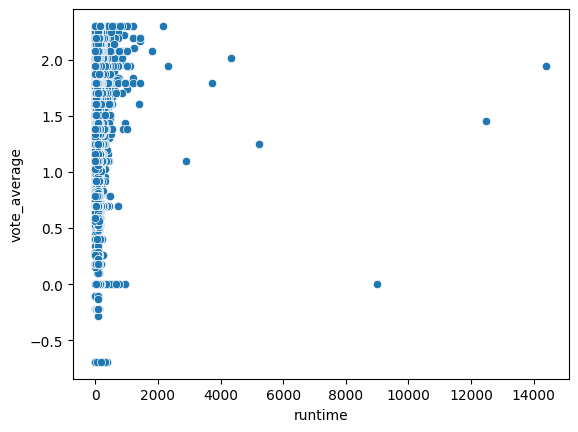

In [83]:
sns.scatterplot(x='runtime', y=np.log(df['vote_average']), data=df);

upon calculating the correlation between **runtime** and **IMDB Rating** we observed that there was no correlation between them as we got a correlation value of **0.24**, this indicates a weak correlation or close to no correlation and can also be seen through the scatter plot

####**Does the number of votes correlate with the IMDb rating?**

In [84]:
df.vote_count.corr(df.vote_average)

0.09536357660283676

<Axes: xlabel='vote_count', ylabel='vote_average'>

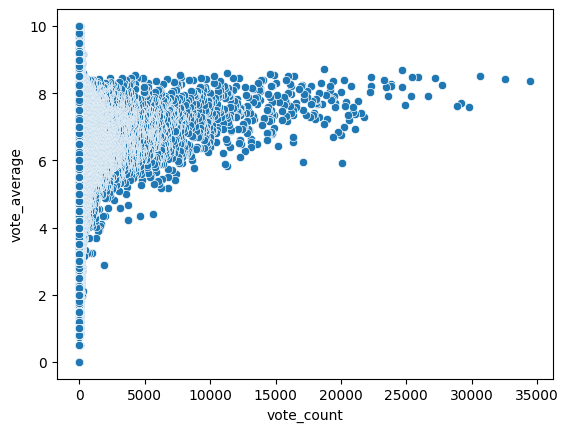

In [85]:
sns.scatterplot(x='vote_count' , y='vote_average' , data = df)

After checking the correlation between **Votes** and **IMDB Rating** we observer a value of **0.09536357660283676**, which indicates a weak positive correlation between the two features

####**How has the average IMDb rating changed over the years?**

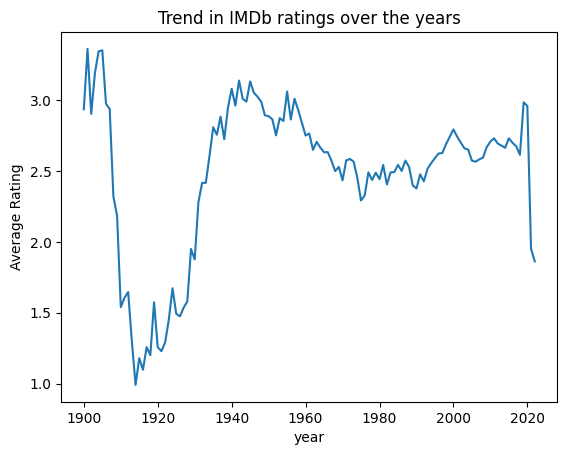

In [103]:
IMDB_rating_trend = df.groupby('year').vote_average.mean()
IMDB_rating_trend = IMDB_rating_trend[IMDB_rating_trend.index < 2023]
IMDB_rating_trend.plot(
    kind = 'line',
    xlabel = 'year',
    ylabel = 'Average Rating',
    title = 'Trend in IMDb ratings over the years'
);

It can be seen through the line graph plotted for the average IMDB rating over the past decades and it can be observed that the rating had a fluctuation, and it and and increasing and decreasing trend, for few year it increased and for some years it had a drastic decrease in it.

####**What is the trend in movie runtimes over the decades?**

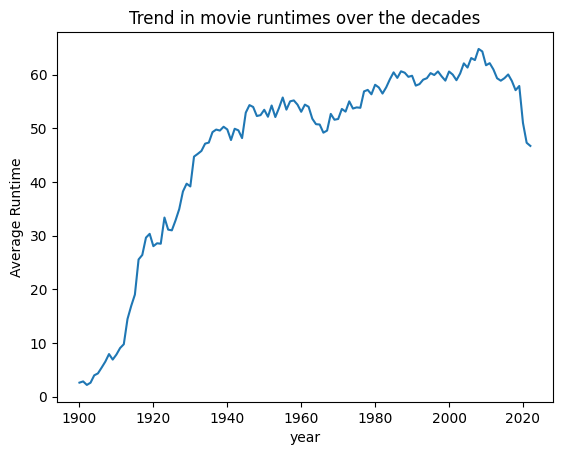

In [102]:
runtime_trend = df.groupby('year').runtime.mean()
runtime_trend = runtime_trend[runtime_trend.index < 2023]
runtime_trend.plot(
    kind = 'line',
    xlabel = 'year',
    ylabel = 'Average Runtime',
    title = 'Trend in movie runtimes over the decades'
);

It can be observed through the line graph that over the past decades the runtime of the movies increased constantly with few years having lesser runtime then the previous year. Overall the runtimes increased and are seen to be decreasing in the past 2 to 3 years.

####**What are the top 10 most voted movies?**

In [88]:
mostVotes = df.vote_count.sort_values(ascending = False).head(10)
mostVotes

,vote_count
0,34495
1,32571
2,30619
3,29815
4,29166
5,28894
6,27713
7,27238
8,26638
9,25893


In [92]:
df[df.vote_count.isin(mostVotes)]

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,budget,...,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,year
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,160000000,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",2010.0
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,165000000,...,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",2014.0
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,185000000,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",2008.0
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,237000000,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",2009.0
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,220000000,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",2012.0
5,293660,Deadpool,7.606,28894,Released,2016-02-09,783100000,108,False,58000000,...,Deadpool,The origin story of former Special Forces oper...,72.735,Witness the beginning of a happy ending.,"Action, Adventure, Comedy","20th Century Fox, The Donners' Company, Genre ...",United States of America,English,"superhero, anti hero, mercenary, based on comi...",2016.0
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,300000000,...,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa","sacrifice, magic, superhero, based on comic, s...",2018.0
7,550,Fight Club,8.438,27238,Released,1999-10-15,100853753,139,False,63000000,...,Fight Club,A ticking-time-bomb insomniac and a slippery s...,69.498,Mischief. Mayhem. Soap.,Drama,"Regency Enterprises, Fox 2000 Pictures, Taurus...",United States of America,English,"dual identity, rage and hate, based on novel o...",1999.0
8,118340,Guardians of the Galaxy,7.906,26638,Released,2014-07-30,772776600,121,False,170000000,...,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",33.255,All heroes start somewhere.,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,"spacecraft, based on comic, space, orphan, adv...",2014.0
9,680,Pulp Fiction,8.488,25893,Released,1994-09-10,213900000,154,False,8500000,...,Pulp Fiction,"A burger-loving hit man, his philosophical par...",74.862,Just because you are a character doesn't mean ...,"Thriller, Crime","Miramax, A Band Apart, Jersey Films",United States of America,"English, Spanish, French","drug dealer, boxer, massage, stolen money, bri...",1994.0


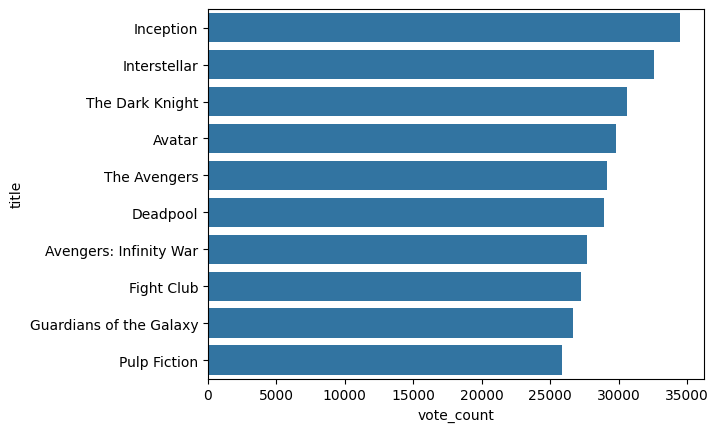

In [98]:
sns.barplot(y=df[df.vote_count.isin(mostVotes)].title, x=df[df.vote_count.isin(mostVotes)].vote_count );

##**Summary & Conclusion**

Insights:

After analyzing the 1 million plus records of the dataset we come to the conclusion that

*  The dataset contains no data related to the director/directors of the movies that have been released
*  The data contains alot of outliers, such as release dates contain data to the year 2099
*  There are about 13000+ combined genres that have a rating of 10
*  The run time has increased in the past decades at a constant rate
*  The run time and IMDB rating have no correlation
*  The vote count and IMDB rating have a weak positive correlation
*  The maximum revenue generated by a movie was **4999999999**


